## Random Forest

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [137]:
df = pd.read_pickle("engineered_df.pkl")
df.head()

,SalePrice,Neighborhood,RoofMatl,1stFlrSF,KitchenQual,AgeAtSale,TotalHalfBath,FinBasmt,Pool
0,126000,18,0,856,4,71,0.0,1,0
1,139500,6,0,1049,2,25,0.0,1,0
2,124900,9,0,1001,2,77,0.0,1,0
3,114000,17,0,717,4,109,0.0,0,0
4,227000,14,0,810,2,8,1.0,1,0


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [139]:
X = df.loc[:, df.columns != 'SalePrice']
y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
forest = RandomForestRegressor(n_estimators=100, max_depth=200)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=200)

In [141]:
forest.score(X_train, y_train)

0.9721521364789951

In [142]:
forest.score(X_test, y_test)

0.7974743825871344

In [143]:
param_grid = { 
    'n_estimators': [50, 75, 100, 200],
    'max_depth' : [30, 50, 100, 200],
}
CV_forest = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)
CV_forest.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=200),
             param_grid={'max_depth': [30, 50, 100, 200],
                         'n_estimators': [50, 75, 100, 200]})

In [144]:
CV_forest.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [145]:
CV_forest.score(X, y)

0.9743369824011007

## RF Feature Importance

In [146]:
# create dict matching feature name to its importance
important_feats = {X.columns[i] : CV_forest.best_estimator_.feature_importances_[i] for i in range(len(X.columns))}

In [147]:
# subset just the most important
most_imp_feats = {}
for i in important_feats.keys():
    if important_feats[i] > 0.002:
        most_imp_feats.update({i : important_feats[i]})
# sort
most_imp_feats = dict(sorted(most_imp_feats.items(), key=lambda item: item[1]))

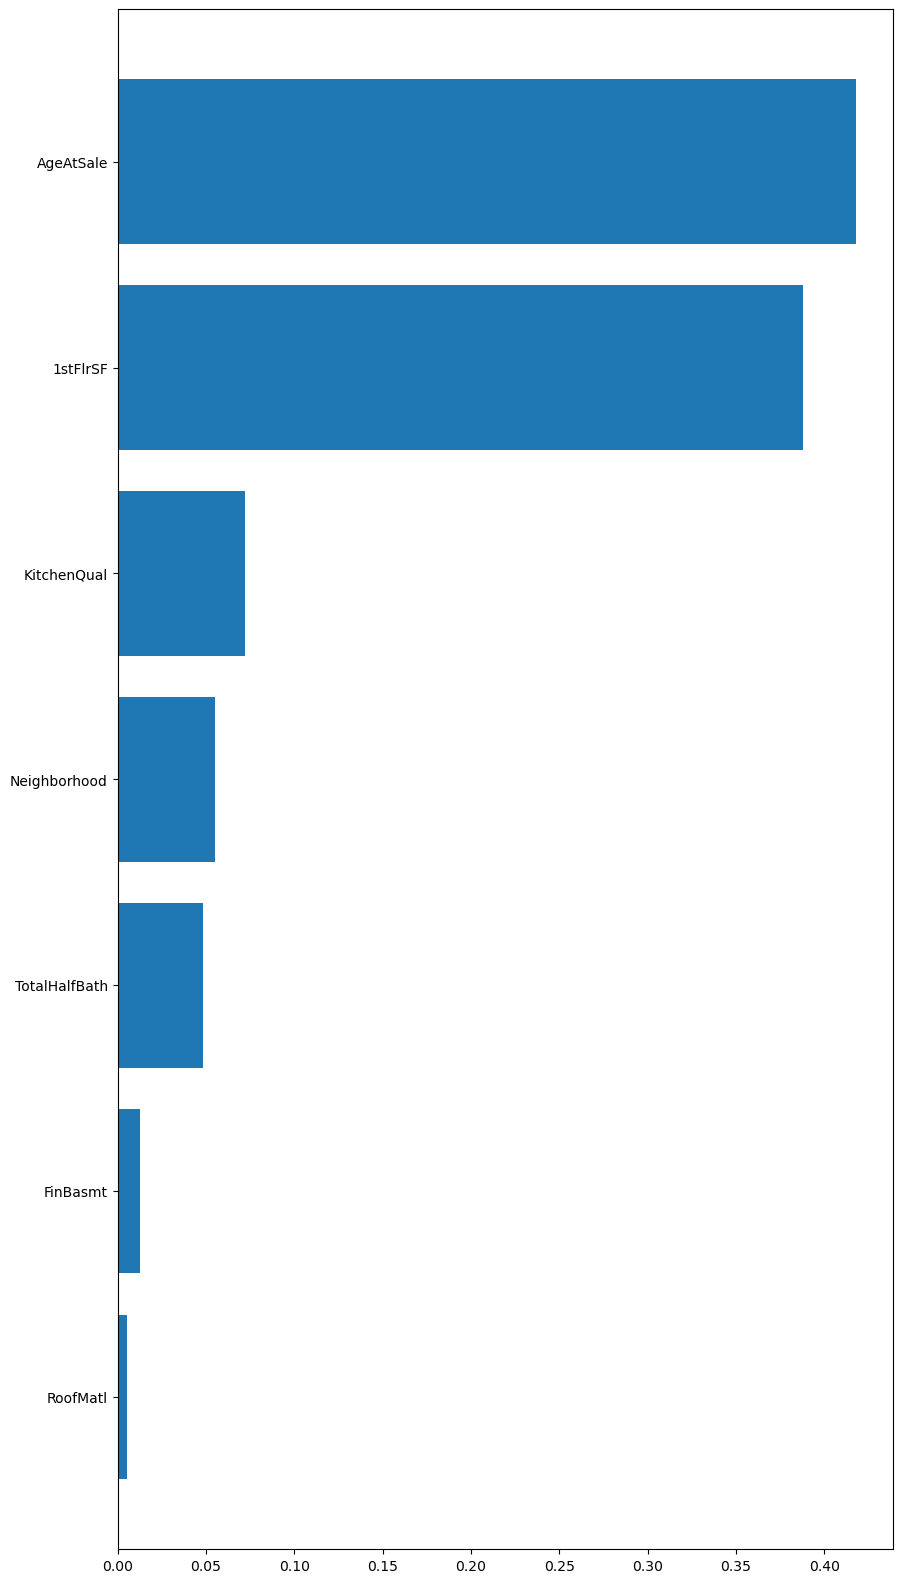

In [148]:
# plot
plt.figure(figsize=(10,20))
plt.barh(list(most_imp_feats.keys()),most_imp_feats.values())
plt.show()

In [149]:
most_imp_feats.items()

dict_items([('RoofMatl', 0.005260980094629279), ('FinBasmt', 0.012618996752600087), ('TotalHalfBath', 0.04856964311050052), ('Neighborhood', 0.05514416734207849), ('KitchenQual', 0.07230418798410546), ('1stFlrSF', 0.38773081404697857), ('AgeAtSale', 0.4177716280228985)])

In [ ]:
# overfitting
# what are the important features?